In [1]:
%pylab inline
import imageio
import pandas
from scipy.stats import linregress
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


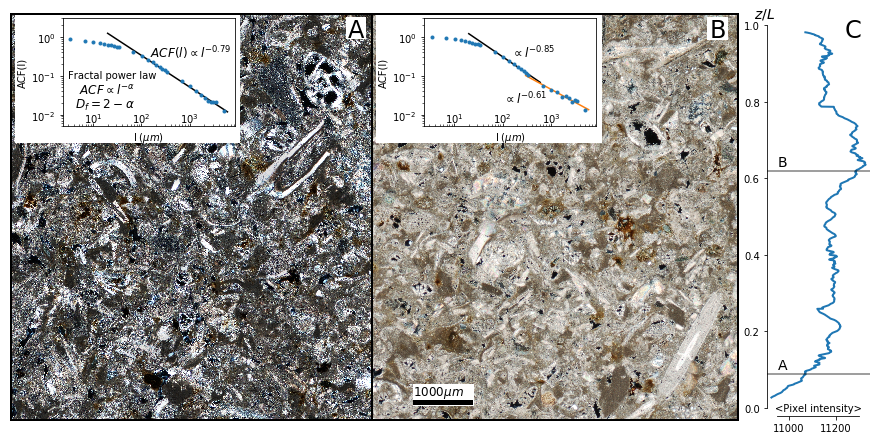

In [76]:
# Thin section at 10mm
e10 = loadtxt("WormholeGrowth/10new_correlation_data/e01.dat", delimiter=",")
c_e10 = loadtxt("WormholeGrowth/10new_correlation_data/c_e01.dat", delimiter=",")
e10 = e10*1.699*2
# Thin section at 70mm
e70 = loadtxt("WormholeGrowth/70_correlation_data/e01.dat", delimiter=",")
c_e70 = loadtxt("WormholeGrowth/70_correlation_data/c_e01.dat", delimiter=",")
e70 = e70*3.406

# Figure drawing
fig = figure(figsize=(12,6))
# Axes

ax10ts = fig.add_axes([0.005,0.04,0.423,0.94]) # 10mm thin section cross-polar (XPL) img
ax10ts.set_xticks([])
ax10ts.set_yticks([])
ax70ts = fig.add_axes([0.4235,0.04,0.423,0.94]) #70mm XPL img
ax70ts.set_xticks([])
ax70ts.set_yticks([])

# Plot thin section
img10 = imageio.imread("WormholeGrowth/PZ101ts_10mm_region_new.tiff")
ax10ts.imshow(img10)
img70 = imageio.imread("WormholeGrowth/PZ101ts_70mm_region_new.tiff")
ax70ts.imshow(img70)

# Scale bar
brect = Rectangle((200,1820), 300, 110, facecolor="white")
ax70ts.add_patch(brect)

srect = Rectangle((200,3800/2), 1000/(3.39), 100/4, facecolor="k")
ax70ts.add_patch(srect)
ax70ts.text(200,3750/2, r"$1000\mu m$", fontsize=12, color="k")

for key,spine in ax10ts.spines.items():
    spine.set_lw(2) # Make border bolder
for key,spine in ax70ts.spines.items():
    spine.set_lw(2)

# Correlation plotting setup
ax10c = fig.add_axes([0.065,0.72,0.2,0.25]) # 10mm correlation
ax70c = fig.add_axes([0.423+0.06,0.72,0.2,0.25]) # 70mm correlation

ax10c.tick_params(axis="x", which="both", direction="in", pad=-15) # Move x-ticks inside to conserve space
ax70c.tick_params(axis="x", which="both", direction="in", pad=-15)

ax10c.set_ylim([5e-3,3]) # Custom axes limits, matched
ax70c.set_ylim([5e-3,3])

bgrect = Rectangle((40,10), 2260-40, 1260, facecolor="white") #BG Rectangle on ts images for correlations
ax10ts.add_patch(bgrect)
bgrect = Rectangle((20,5), 2260/2-20, 1260/2, facecolor="white")
ax70ts.add_patch(bgrect)

ax10c.set_ylabel("ACF(l)")
ax10c.set_xlabel(r"l ($\mu m$)")
ax70c.set_ylabel("ACF(l)")
ax70c.set_xlabel(r"l ($\mu m$)")


# Plot correlation linear regressions
sl, itc, _, _, _ = linregress(log(e10[11:-3]), log(c_e10[11:-3]))
x_mod = logspace(log10(20),log10(6e3))
ax10c.plot(x_mod, exp(itc)*x_mod**sl, color="k") # ts at 10mm

sl, itc, _, _, _ = linregress(log(e70[11:20]), log(c_e70[11:20]))
x_mod = logspace(log10(20),log10(6e2))
ax70c.plot(x_mod, exp(itc)*x_mod**sl, color="k") #ts at 70mm, l<500um

sl, itc, _, _, _ = linregress(log(e70[20:-3]), log(c_e70[20:-3]))
x_mod = logspace(log10(3e2),log10(6e3))
ax70c.plot(x_mod, exp(itc)*x_mod**sl, color="tab:orange") # >=500um

# Plot data points
ax10c.loglog(e10[:-3], c_e10[:-3], '.', color="tab:blue")
ax70c.loglog(e70[:-3], c_e70[:-3], '.', color="tab:blue")

# Labels
ax10c.text(150, 0.3, r"$ACF(l)\propto l^{-0.79}$", fontsize=12)
ax10c.text(3,0.09, "Fractal power law")
ax10c.text(3,0.035, r"   $ACF \propto l^{-\alpha}$", fontsize=12)
ax10c.text(3,0.015,r"  $D_f = 2-\alpha$", fontsize=12)

ax70c.text(150, 0.3, r"$\propto l^{-0.85}$", fontsize=12)
ax70c.text(100, 0.02, r"$\propto l^{-0.61}$", fontsize=12)

# Per slice sum plotting
pssax = fig.add_axes([0.88,0.05,0.12,0.93])

# Plot data
pss = fromfile("WormholeGrowth/PZ101_pss_avg.dat", sep=",")
#pss = fromfile("WormholeGrowth/PZ101_pss_corr_avg.dat", sep=",")
#core length is 3766 slices, core starts on ~slice 50, but is not completely cylindrical until ~150
zL = (arange(pss[150:-120].size, dtype=float)+100)/3766 # 150-50=100
pssax.plot(pss[150:-120],zL, lw=2) # Do not plot edges where core is not completely cylindrical
pssax.set_xlabel("<Pixel intensity>", labelpad=-30)

pssax.spines["right"].set_visible(False) # Get rid of right and top spines
pssax.spines["top"].set_visible(False)
pssax.spines["left"].set_bounds(0,1) # Custom bounds for aesthetics
pssax.spines["bottom"].set_bounds(10950, 11300)
pssax.text(10850, 1.02, r"$z/L$",fontsize=14) # Y-axes label

# Indicate where thin sections were taken from
pssax.axhline(1/11.3, color="k", alpha=0.5)
pssax.axhline(7/11.3, color="k", alpha=0.5)
pssax.text(10950, 1.15/11.3, "A", fontsize=14)
pssax.text(10950, 7.15/11.3, "B", fontsize=14)



# Subplot labels
arect = Rectangle((3300,30), 200, 220, facecolor="white")
ax10ts.add_patch(arect)
brect = Rectangle((3300/2,15), 100, 110, facecolor="white")
ax70ts.add_patch(brect)

fig.text(0.395,0.927,"A", fontsize=24)
fig.text(0.814,0.927,"B", fontsize=24)
fig.text(0.97, 0.927, "C", fontsize=24) # Subplot label

savefig("ThinSectionFig.pdf")
show()

In [59]:
print(linregress(log(e10[8:-3]), log(c_e10[8:-3])))
x = sm.add_constant(log(e10[8:-3]))
res = sm.OLS(log(c_e10[8:-3]), x).fit()
print(diff(res.conf_int(0.05)[1])/2)

print(linregress(log(e70[11:20]), log(c_e70[11:20])))
x = sm.add_constant(log(e70[11:20]))
res = sm.OLS(log(c_e70[11:20]), x).fit()
print(diff(res.conf_int(0.05)[1])/2)
print(linregress(log(e70[20:-4]), log(c_e70[20:-4])))
x = sm.add_constant(log(e70[20:-4]))
res = sm.OLS(log(c_e70[20:-4]), x).fit()
print(diff(res.conf_int(0.05)[1])/2)

LinregressResult(slope=-0.8129478641200505, intercept=2.3531807422306223, rvalue=-0.997427979217247, pvalue=2.2618886969722994e-24, stderr=0.013062880417852517)
[0.02724869]
LinregressResult(slope=-0.8478258203105165, intercept=2.7308450094490144, rvalue=-0.999233917274955, pvalue=4.094287922536345e-11, stderr=0.012550472946636384)
[0.02967715]
LinregressResult(slope=-0.6059230387326824, intercept=1.0594200055885112, rvalue=-0.9759366320386478, pvalue=6.951525687633812e-06, stderr=0.05116954302867301)
[0.12099674]


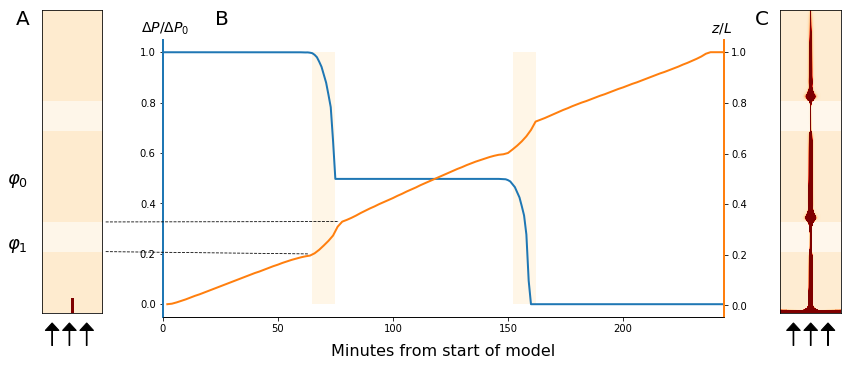

In [1021]:
tipdf = pandas.read_csv("WormholeGrowth/tiptable.dat", sep="\t", index_col="Time")
presdf = pandas.read_csv("WormholeGrowth/prestable.dat", sep="\t")#, index_col="Time")
presdf["Time"] = linspace(1,244,244)
presdf.set_index("Time")

fig = figure(figsize=(12,5))

ax = fig.add_axes([0.19,0.13,0.65,0.77])

# Add Highlights
highlight = Rectangle((65,0),10,1, facecolor="#FFF6E7", alpha=1)
ax.add_patch(highlight)
highlight = Rectangle((152,0),10,1, facecolor="#FFF6E7", alpha=1)
ax.add_patch(highlight)

# Plot data
presdf.dP.plot(ax=ax, lw=2)
tipdf["Pos"] = tipdf["Pos"]/tipdf["Pos"].max()
tipdf.Pos.plot(ax=ax,lw=2,secondary_y=True)
ax.set_xlabel("Minutes from start of model", fontsize=16, labelpad=10)
fig.text(0.165,0.92, r"$\Delta P/\Delta P_0$", fontsize=14)
fig.text(0.825, 0.92, r"$z/L$", fontsize=14)
ax.spines["top"].set_visible(False)
ax =fig.gca()
ax.spines["top"].set_visible(False)

#Use spines as legend
ax.spines['left'].set_color('#1f77b4')
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_color('#ff7f0e')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_hatch("x")


# Setup initial and final geometry plots
lax = fig.add_axes([0.05,0.14,0.07,0.07*12./5*1001./200]) # Height is proportional to w/h of data AND figure
lax.set_xticks([])
lax.set_yticks([])

rax = fig.add_axes([0.905,0.14,0.07,0.07*12./5*1001./200])
rax.set_xticks([])
rax.set_yticks([])

fig.text(0.01,0.5,r"$\varphi_0$", fontsize=18)
fig.text(0.01,0.32,r"$\varphi_1$", fontsize=18)

# Initial geometry
layers = zeros((1001,200)) # Dimensions
layers[:300,:] = 0.1
layers[300:400,:] = 0.01
layers[400:700,:] = 0.1
layers[700:800,:] = 0.01
layers[800:,:] = 0.1
layers[950:,95:106] = 1 # Precut
lax.imshow(layers, cmap="OrRd", norm=Normalize(0,1)) # Normalize from 0-1 to match colors in final geom.

# Final geometry
fingeom = fromfile("WormholeGrowth/table2.dat", sep="\t")
fingeom = fingeom.reshape(1001,200)
fingeom = flipud(fingeom)
rax.imshow(fingeom,cmap="OrRd")

# Arrows
from matplotlib.patches import FancyArrow
aaxl = fig.add_axes([0.042,0.05,0.08,0.07])
aaxl.set_xticks([])
aaxl.set_yticks([])
flowdir = FancyArrow(0.25, 0, 0, 0.6, width=0.01, head_width=0.2, color="k")
aaxl.add_patch(flowdir)
flowdir = FancyArrow(0.5, 0, 0, 0.6, width=0.01, head_width=0.2, color="k")
aaxl.add_patch(flowdir)
flowdir = FancyArrow(0.75, 0, 0, 0.6, width=0.01, head_width=0.2, color="k")
aaxl.add_patch(flowdir)

aaxr = fig.add_axes([0.9,0.05,0.08,0.07])
aaxr.set_xticks([])
aaxr.set_yticks([])
flowdir = FancyArrow(0.25, 0, 0, 0.6, width=0.01, head_width=0.2, color="k")
aaxr.add_patch(flowdir)
flowdir = FancyArrow(0.5, 0, 0, 0.6, width=0.01, head_width=0.2, color="k")
aaxr.add_patch(flowdir)
flowdir = FancyArrow(0.75, 0, 0, 0.6, width=0.01, head_width=0.2, color="k")
aaxr.add_patch(flowdir)

for name, spine in aaxl.spines.items():
    spine.set_visible(False)
for name, spine in aaxr.spines.items():
    spine.set_visible(False)

# Subplot labels
fig.text(0.02,0.94, "A", fontsize=20)
fig.text(0.25,0.94, "B", fontsize=20)
fig.text(0.875,0.94, "C", fontsize=20)

dotax = fig.add_axes([0.10,0.3,0.3,0.11], zorder=0)

def line(x0, y0, x1, y1):
    m = (y1-y0)/(x1-x0)
    b = y0-m*x0
    return m, b

dotax.patch.set_facecolor(None)
dotax.patch.set_alpha(0)
dotax.axis("Off")
#dotax.axhline(0.1)
dotax.set_ylim([0,1])
dotax.set_xlim([0,1])
m, b = line(0.08, 0.1, 0.9,0.04)
xmod = linspace(0.08,0.86)
dotax.plot(xmod, m*xmod+b, "--", color="k", lw=0.8)

m, b = line(0.08, 0.85, 0.99,0.86)
xmod = linspace(0.08,0.98)
dotax.plot(xmod, m*xmod+b, "--", color="k", lw=0.8)

savefig("Fig2_Model.pdf")
show()

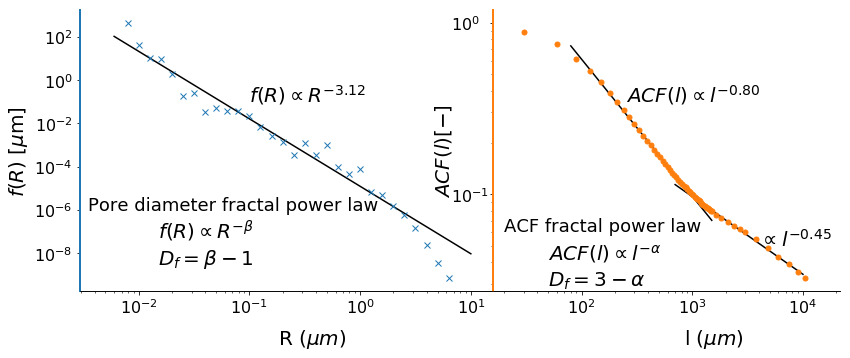

In [3]:
# Autocorrelation of PZ103
# Cropped 770x770 x:275, y:285, slice 49 1-index (48 0-index) to 3801 inclusive

sansdf = pandas.read_csv("WormholeGrowth/sans.dat", sep="\t")#, index_col="ang")

e = loadtxt("WormholeGrowth/PZ103_Correlation_Data/e01.dat", delimiter=",")
e = append(e, loadtxt("WormholeGrowth/PZ103_Correlation_Data/e02.dat", delimiter=","))
e = append(e, loadtxt("WormholeGrowth/PZ103_Correlation_Data/e03.dat", delimiter=","))
c_e = loadtxt("WormholeGrowth/PZ103_Correlation_Data/c_e01.dat", delimiter=",")
c_e = append(c_e, loadtxt("WormholeGrowth/PZ103_Correlation_Data/c_e02.dat", delimiter=","))
c_e = append(c_e, loadtxt("WormholeGrowth/PZ103_Correlation_Data/c_e03.dat", delimiter=","))
e = e*30.

fig = figure(figsize=(12,5))
sansax = fig.add_axes([0.1, 0.17, 0.88, 0.78])

# Plot SANS data
sl, ict, _, _, _ = linregress(log(sansdf.ang.values*0.0001)[:-3], log(sansdf.fR.values*1/0.0001)[:-3])
xmod = logspace(log10(6e-3), log10(10))
sansax.loglog(xmod, exp(ict)*xmod**sl, color="k") # Model
sansax.loglog(sansdf.ang.values[:-1]*0.0001, sansdf.fR.values[:-1]*1/0.0001, 'x') # Data


acfax = sansax.twinx() # Secondary axis for tomography acf

# Plot ACF data
sl, ict, _, _, _ = linregress(log(e[4:35]), log(c_e[4:35]))
xmod = logspace(log10(0.8e2), log10(1.5e3)) 
acfax.loglog(xmod, exp(ict)*xmod**sl, color="k") # Model to 1mm
sl, ict, _, _, _ = linregress(log(e[35:-14]), log(c_e[35:-14]))
xmod = logspace(log10(0.7e3), log10(1e4))
acfax.loglog(xmod, exp(ict)*xmod**sl, color="k") # Model from 1mm
acfax.loglog(e[:-14], c_e[:-14], '.', color="tab:orange", markersize=10)

# Set up axes and their labels
sansax.set_xlabel(r"", fontsize=14)
sansax.set_ylabel(r"$f(R)$ [$\mu$m]", fontsize=20)
acfax.set_ylabel(r"$ACF(l) [-]$", fontsize=20, labelpad=-60)
sansax.spines["top"].set_visible(None)
acfax.spines["top"].set_visible(None)
sansax.spines["left"].set_color("tab:blue")
acfax.spines["left"].set_color("tab:blue")
sansax.spines["left"].set_linewidth(2)
acfax.spines["left"].set_linewidth(2)
acfax.spines["right"].set_position(('data', 2.2)) # Move right spine to border between sans and acf
acfax.spines["right"].set_color("tab:orange")
acfax.spines["right"].set_linewidth(2)
acfax.tick_params(axis="y", direction="in", which="both", pad=-42)
sansax.tick_params(axis="both", labelsize=16)
acfax.tick_params(axis="both", labelsize=16)
sansax.spines["right"].set_visible(None) # Turn off right spine on sans axes

fig.text(0.33,0.02, r"R ($\mu m)$", fontsize=20)
fig.text(0.8,0.02, r"l ($\mu m)$", fontsize=20)

# Labels
sansax.text(3.5e-3, 1e-6, "Pore diameter fractal power law", fontsize=18)
sansax.text(1.5e-2, 5e-8, r"$f(R)\propto R^{-\beta}$", fontsize=20)
sansax.text(1.5e-2, 3e-9, r"$D_f = \beta - 1$", fontsize=20)
sansax.text(1e-1, 1e-1, r"$f(R) \propto R^{-3.12}$", fontsize=20)

sansax.text(2.e1, 1e-7, "ACF fractal power law", fontsize=18)
sansax.text(5e1, 5e-9, r"$ACF(l)\propto l^{-\alpha}$", fontsize=20)
sansax.text(5e1, 3e-10, r"$D_f = 3 - \alpha$", fontsize=20)
sansax.text(2.5e2, 1e-1, r"$ACF(l) \propto l^{-0.80}$", fontsize=20)
sansax.text(4e3, 2e-8, r"$\propto l^{-0.45}$", fontsize=20)
savefig("Fig3_FractalDim.pdf")
show()

In [4]:
print(linregress(log(sansdf.ang.values)[:-3], log(sansdf.fR.values)[:-3]))
print((sansdf.ang.values*0.1)[:-3])

LinregressResult(slope=-3.120420429716958, intercept=8.223744526227398, rvalue=-0.9831770798140146, pvalue=9.989192051667013e-21, stderr=0.11369101206904263)
[   7.94328   10.        12.58925   15.84892   19.95261   25.11884
   31.62274   39.81066   50.11865   63.09562   79.43267   99.99978
  125.89224  158.4889   199.52566  251.18787  316.22672  398.10577
  501.18536  630.95485  794.32492  999.99561 1258.91961 1584.88554
 1995.25224 2511.87319 3162.2603  3981.04898]


In [32]:
import statsmodels.api as sm

In [98]:
print(linregress(log(e[4:35]), log(c_e[4:35])))
x =sm.add_constant(log(e[4:35]))
res = sm.OLS(log(c_e[4:35]), x).fit()
print(res.summary())
print(res.conf_int(0.05))
#print(linregress(log(e[35:-14]), log(c_e[35:-14])))
print(2.042*0.0046)
print(-0.7998+0.79026942)

LinregressResult(slope=-0.7998418696822932, intercept=3.1939671486068666, rvalue=-0.9995038662655095, pvalue=4.137653167784717e-45, stderr=0.004680380489276492)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.920e+04
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           4.14e-45
Time:                        18:33:47   Log-Likelihood:                 86.797
No. Observations:                  31   AIC:                            -169.6
Df Residuals:                      29   BIC:                            -166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

/Users/maxc/anaconda2/lib/python2.7/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: 'module' object has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/maxc/anaconda2/lib/python2.7/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: 'module' object has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/maxc/anaconda2/lib/python2.7/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: 'module' object has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/maxc/anaconda2/lib/python2.7/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: 'module' object has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/maxc/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:908:

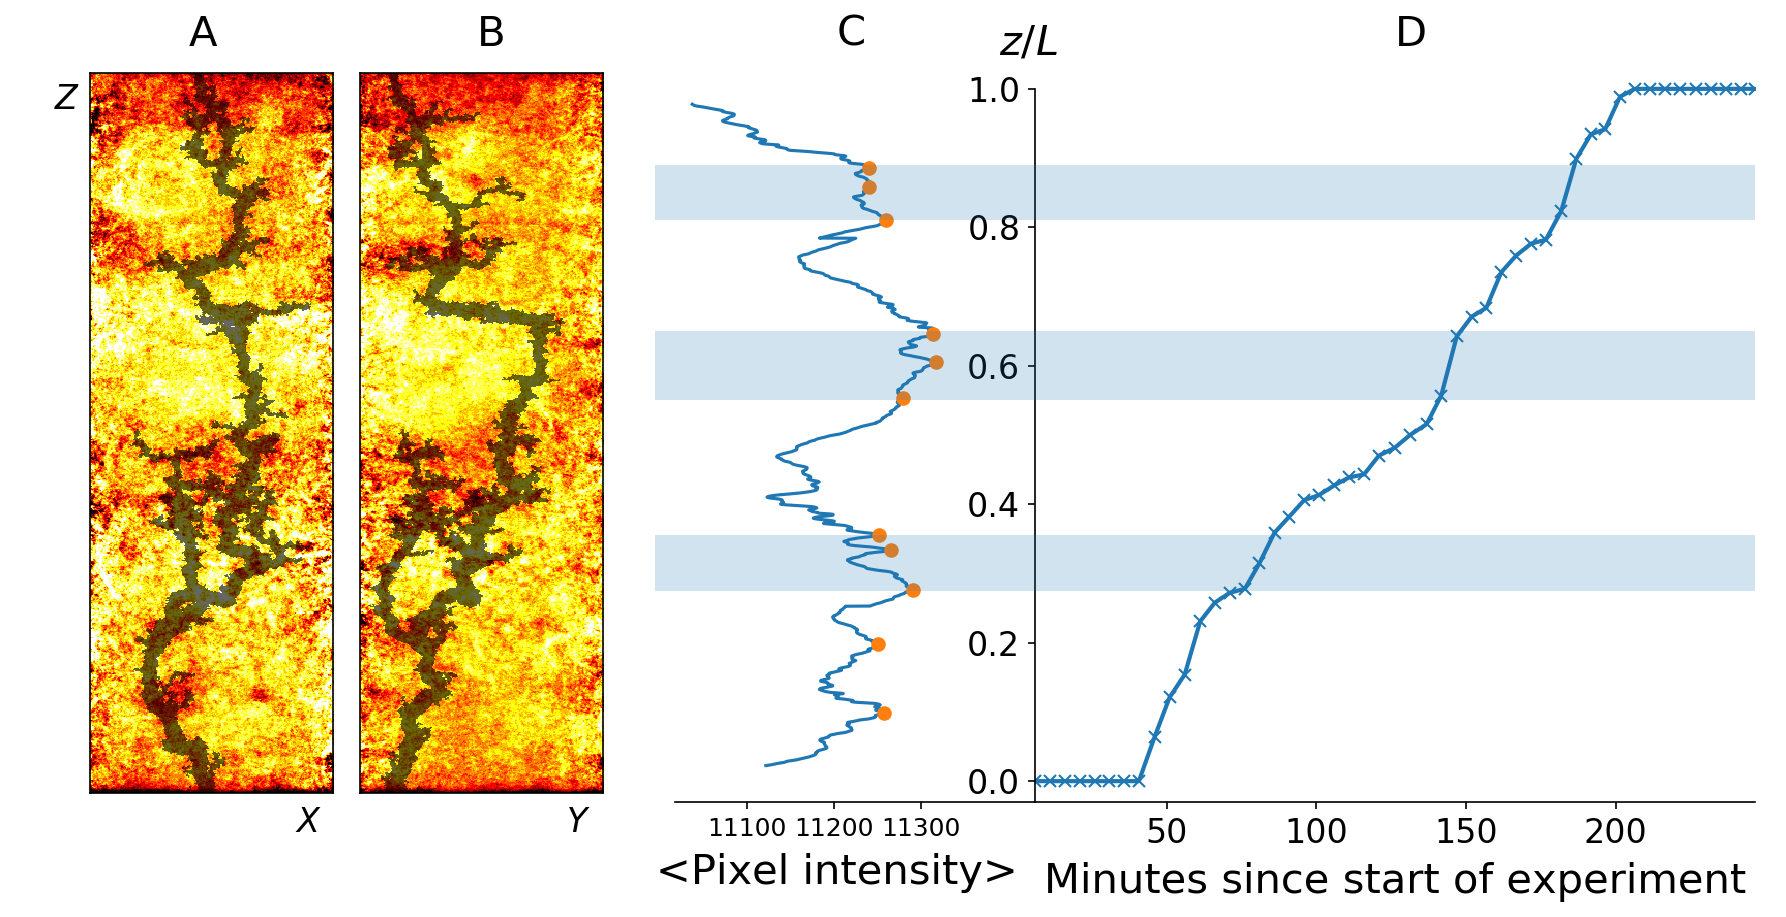

In [6]:
fig = figure(figsize=(12,6), dpi=150)

pssax = fig.add_axes([0.35,0.11,0.2,0.85])
tpax = fig.add_axes([0.55,0.11,0.95-0.55,0.85])

#Core appears solid ~slice 37 (1-index), ends ~3781, 3781-37=3744
pss = fromfile("WormholeGrowth/PZ103_per_slice_sum_avg.dat", sep=",")
#pss = fromfile("WormholeGrowth/PZ103_pss_corr_avg.dat", sep=",")
zL = (arange(pss[120:-190].size)+120-36)/3744.
pssax.plot(pss[120:-190],zL) # Plot data

# Find peaks
M = 15 # Filter size
sigma = 50 # Std deviation for gaussian filter
gaus_win = signal.windows.gaussian(M, sigma) # Gaussian filter
pss_gaus = signal.convolve(pss[120:-190], gaus_win, "same")/M # Apply filter
peaks = signal.find_peaks(pss_gaus, height=11180, distance=80, prominence=5) # must have pss>11200 and at least 80 samples apart
pssax.plot(pss[120:-190][peaks[0]],zL[peaks[0]], "o") # Plot peaks


# Z-pos measured from skeletons, 710 slices, starts at 119 (1-index) to 828 (inclusive)
# Core starts ~126, ends ~824

tdf = pandas.read_csv("WormholeGrowth/PZ103_TipPos2.csv")
tdf["End"] = pandas.to_datetime(tdf["End"])
#Same time conversion as pressure
tdf_timedelt = tdf["End"] - pandas.Timestamp("2020-07-31 08:40:55.073")
tdf_timedelt = tdf_timedelt // pandas.Timedelta('1ms') / 60000
tdf["Time since beginning of experiment (m)"] = tdf_timedelt
tdf = tdf.set_index('Time since beginning of experiment (m)')
tdf["Z2"] = clip( tdf["Z2"] - (126-119), 0, tdf["Z2"].max() ) / (tdf["Z2"].max()- (126-119)) # Convert to z/L
tdf["Z2"].plot(ax=tpax, marker="x", lw=2)

# Image plot

#csim = flipud(imageio.imread("WormholeGrowth/PZ103_vertslice.tif"))

iimg = imageio.volread("WormholeGrowth/PZ103_Initial_DS_Rotated.tif").astype(float64)
whimg = imageio.volread("WormholeGrowth/PZ103_01-50_CComponents.tif").astype(float64)

iimg[iimg == 0] = np.nan
whimg[whimg == 0] = np.nan
beam_hard_avg = np.nanmedian(iimg, axis = 0)
cimg = iimg - beam_hard_avg

yz_proj_img = np.nanmedian(cimg, axis = 1)
xz_proj_img = np.nanmedian(cimg, axis = 2)

yz_proj_wh = np.nanmedian(whimg, axis = 1)
xz_proj_wh = np.nanmedian(whimg, axis = 2)

yz_proj_img -= np.nanmin(yz_proj_img)
yz_proj_img *= 255/np.nanmax(yz_proj_img)

xz_proj_img -= np.nanmin(xz_proj_img)
xz_proj_img *= 255/np.nanmax(xz_proj_img)

imax = fig.add_axes([0.02,0.12,1.8/12.-0.005,0.8])
imax.imshow(flipud(yz_proj_img[:,6:-9]), cmap="hot", vmin=100, vmax=170)
imax.imshow(flipud(yz_proj_wh[:,6:-9]), cmap="binary_r", alpha=0.6)
imax.set_yticks([])
imax.set_xticks([])

imax2 = fig.add_axes([0.17,0.12,1.8/12.-0.005,0.8])
imax2.imshow(flipud(xz_proj_img[:,6:-9]), cmap="hot", vmin=100, vmax=170)
imax2.imshow(flipud(xz_proj_wh[:,6:-9]), cmap="binary_r", alpha=0.6)
imax2.set_yticks([])
imax2.set_xticks([])

# Highlight regions
hax = fig.add_axes([0.01,0.11,0.94,0.85])
hax.set_ylim([-0.03,1.075])
hax.patch.set_visible(None)
hax.axis("Off")
#hrect = Rectangle((0,0.16), 1, 0.07, alpha=0.2)
#hax.add_patch(hrect)
hrect = Rectangle((0.35,0.55), 1, 0.1, alpha=0.2)
hax.add_patch(hrect)
hrect = Rectangle((0.35,0.275), 1, 0.08, alpha=0.2)
hax.add_patch(hrect)
hrect = Rectangle((0.35,0.81), 1, 0.08, alpha=0.2)
hax.add_patch(hrect)

#hax.plot([-0.1,0.1], [0.5,0.5], '--')
#hax.axhline(0.5, xmin=0, xmax=0.11, color="r", lw=2, linestyle="--")
# hax.axhline((49-37)/3744.) # Alignment lines for image plotting
# hax.axhline(1+9./3744)


# Plotting aesthetics
pssax.spines["left"].set_visible(None)
pssax.spines["top"].set_visible(None)
tpax.spines["top"].set_visible(None)
tpax.spines["right"].set_visible(None)
pssax.spines["right"].set_visible(None)

pssax.set_ylim([-0.03,1.075])
pssax.set_xlim([pss[100:-170].min(), 1.01*pss.max()])
tpax.set_ylim([-0.03,1.075])
pssax.set_yticks([])
pssax.set_xticks([11100, 11200, 11300])
tpax.spines["left"].set_bounds(-0.03,1) # Custom bounds for aesthetics
tpax.set_xlabel("Minutes since start of experiment", fontsize=20, labelpad=6)
pssax.set_xlabel("<Pixel intensity>", fontsize=20, labelpad=6, x = 0.45)
imax.set_xlabel("$X$", fontsize=16, labelpad=6, x=0.9)
imax2.set_xlabel("$Y$", fontsize=16, labelpad=6, x=0.9)

pssax.tick_params(axis="both", labelsize=12)
tpax.tick_params(axis="both", labelsize=16)


# Labels
fig.text(0.53,0.94, r"$z/L$", fontsize=20)
fig.text(0.005,0.88, "$Z$", fontsize=16)

fig.text(0.08,0.95, "A", fontsize=20)
fig.text(0.24,0.95, "B", fontsize=20)
fig.text(0.44,0.95, "C", fontsize=20)
fig.text(0.75,0.95, "D", fontsize=20)

#savefig("TipPos_PSS.pdf")
show()

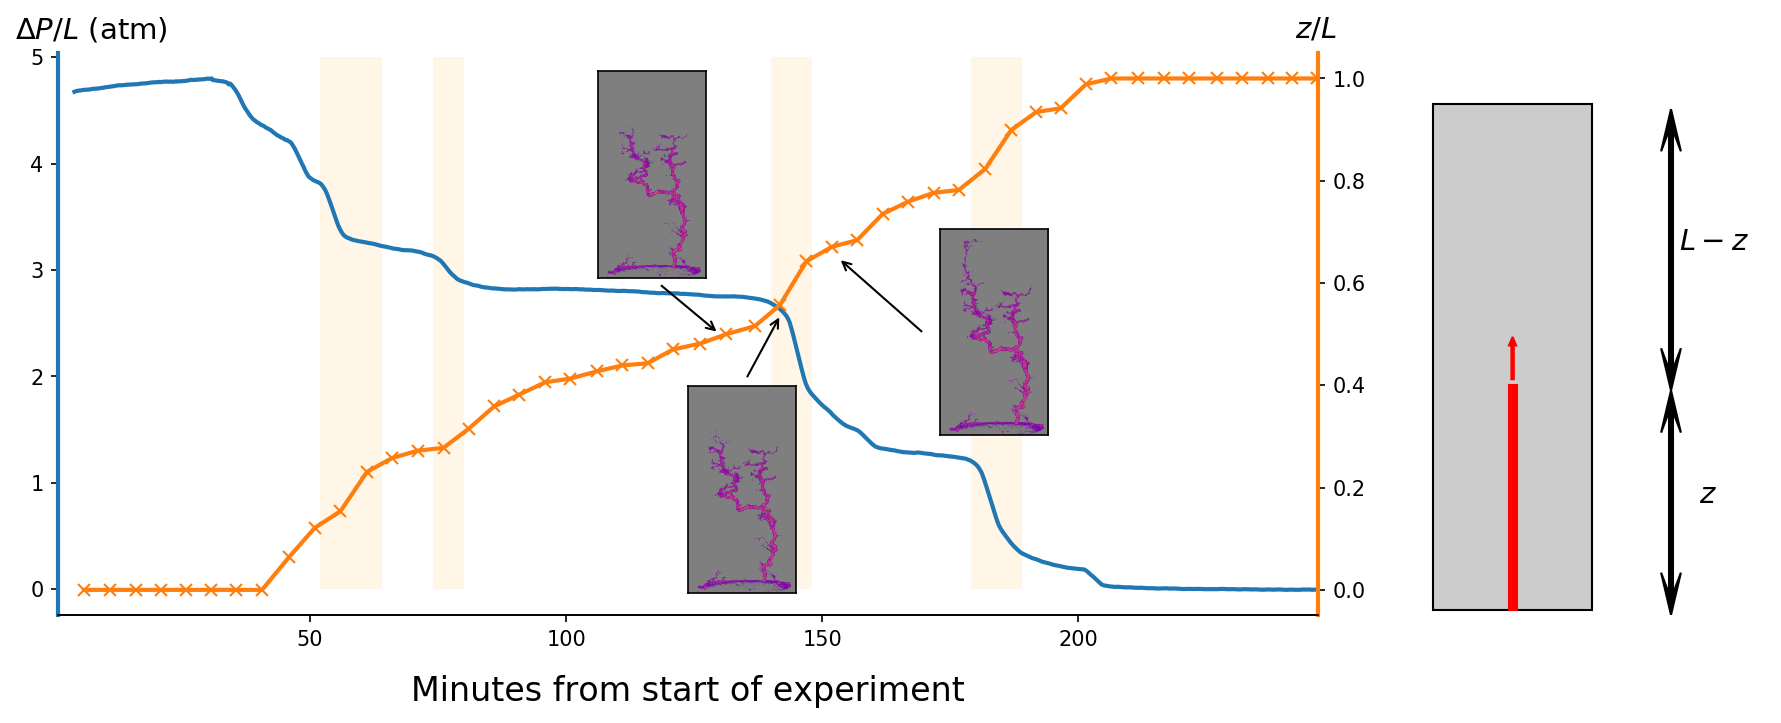

In [79]:
# Prepare pressure data
df = pandas.read_csv("WormholeGrowth/PZ103_PressureLog.csv", sep=";", skiprows=4)
dP = df.iloc[:-1,8:10]
dP['Time SN:702643 (S30X):CH0'] = pandas.to_datetime(dP['Time SN:702643 (S30X):CH0'], format='%m/%d/%Y %I:%M:%S %p.%f')
dP['SN:702643 (S30X):CH0 bar'] = pandas.to_numeric(dP['SN:702643 (S30X):CH0 bar'])
time_delt = dP['Time SN:702643 (S30X):CH0'] - pandas.Timestamp("2020-07-31 08:40:55.073") # Change to change in time
time_delt = time_delt // pandas.Timedelta('1ms')
time_delt = time_delt / 6e4 # Convert to minutes
dP['Time since beginning of experiment (m)'] = time_delt
dP = dP.set_index('Time since beginning of experiment (m)') # Re-index with delta time
pressure = dP['SN:702643 (S30X):CH0 bar'][0.7:247] # Window of core acidization
dPmean = pressure.rolling(20).mean() # Moving average of data to clean fluctuations for plotting
dPmean -= dPmean[220:240].mean() # Subtract value after breakthrough (pressure drops over dispersion disks + lines)

# Prepare to plot tip positions
tdf = pandas.read_csv("WormholeGrowth/PZ103_TipPos2.csv")
tdf["End"] = pandas.to_datetime(tdf["End"])
#Same time conversion as pressure
tdf_timedelt = tdf["End"] - pandas.Timestamp("2020-07-31 08:40:55.073")
tdf_timedelt = tdf_timedelt // pandas.Timedelta('1ms') / 60000
tdf["Time since beginning of experiment (m)"] = tdf_timedelt
tdf = tdf.set_index('Time since beginning of experiment (m)')
tdf["Z2"] = clip( tdf["Z2"] - (126-119), 0, tdf["Z2"].max() ) / (tdf["Z2"].max()- (126-119)) # Convert to z/L

# Plotting

fig= figure(figsize=(12,5), dpi=150)
#ax = fig.gca()
ax = fig.add_axes([0.05,0.15,0.7,0.75])



# Plot
dPmean.plot(ax=ax, style="-", lw=2)
tdf.Z2.plot(ax=ax, linestyle="-", marker="x", lw=2,secondary_y=True, legend=False)
ax.set_xlabel("Minutes from start of experiment", fontsize=16, labelpad=12)
fig.text(0.026,0.92, r"$\Delta P/L$ (atm)", fontsize=14)
fig.text(0.737, 0.92, r"$z/L$", fontsize=14)

# Highlights
highlight = Rectangle((74,0),6,5, facecolor="#FFF6E7", alpha=1)
ax.add_patch(highlight)
highlight = Rectangle((52,0),12,5, facecolor="#FFF6E7", alpha=1)
ax.add_patch(highlight)
highlight = Rectangle((140,0),8,5, facecolor="#FFF6E7", alpha=1)
ax.add_patch(highlight)
highlight = Rectangle((179,0),10,5, facecolor="#FFF6E7", alpha=1)
ax.add_patch(highlight)

# Disable top border
ax.spines['top'].set_visible(False)
ax = fig.gca() # current axis changes with second y, 
ax.spines['top'].set_visible(False)

#Use spines as legend
ax.spines['left'].set_color('#1f77b4')
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_color('#ff7f0e')
ax.spines['right'].set_linewidth(2)



# Draw perm evolution model
dax = fig.add_axes([0.77,0.15,0.22,0.75])
rect = Rectangle((0.2, 0.01), 0.4, 0.9, facecolor="0.8", edgecolor="k") # 0.8 = CCCCCC
dax.add_patch(rect)
wh = Rectangle((0.39, 0.01), 0.02, 0.4, color="red")
dax.add_patch(wh)
growdir = Arrow(0.4, 0.42, 0, 0.075, width=0.03, color="red")
dax.add_patch(growdir)
from matplotlib import patches
parrow = patches.FancyArrow(0.8,0.65,0,0.25, width=0.01, head_width=0.05,\
                           overhang=0.5, length_includes_head=True, facecolor="k")
dax.add_patch(parrow)
parrow = patches.FancyArrow(0.8,0.65,0,-0.25, width=0.01, head_width=0.05,\
                           overhang=0.5, length_includes_head=True, facecolor="k")
dax.add_patch(parrow)
parrow = patches.FancyArrow(0.8,0.25,0,-0.249, width=0.01, head_width=0.05,\
                           overhang=0.5, length_includes_head=True, facecolor="k")
dax.add_patch(parrow)
parrow = patches.FancyArrow(0.8,0.25,0,0.15, width=0.01, head_width=0.05,\
                           overhang=0.5, length_includes_head=True, facecolor="k")
dax.add_patch(parrow)
dax.text(0.87,0.2, r"$z$", fontsize=14)
dax.text(0.82,0.65, r"$L-z$", fontsize=14)
dax.axis("off")

#Scan 31
i31 = imread("WormholeGrowth/PZ103_Frames/PZ103_30r.tif")
i31 = i31[700:-120,1600:2300]
a31 = fig.add_axes([0.54,0.39,0.06,0.06*12./5*i31.shape[0]/i31.shape[1]])
a31.imshow(i31)
a31.set_xticks([])
a31.set_yticks([])

# Scan 29
i29 = imread("WormholeGrowth/PZ103_Frames/PZ103_28r.tif")
i29 = i29[700:-120,1600:2300]
a29 = fig.add_axes([0.4,0.18,0.06,0.06*12./5*i29.shape[0]/i29.shape[1]])
a29.imshow(i29)
a29.set_xticks([])
a29.set_yticks([])

# Scan 27
i27 = imread("WormholeGrowth/PZ103_Frames/PZ103_27r.tif")
i27 = i27[700:-120,1600:2300]
a27 = fig.add_axes([0.35,0.6,0.06,0.06*12./5*i27.shape[0]/i27.shape[1]])
a27.imshow(i27)
a27.set_xticks([])
a27.set_yticks([])
ax.annotate('', xy=(130,0.50), xytext=(118,0.6), arrowprops=dict(arrowstyle="->"))
ax.annotate('', xy=(142,0.54), xytext=(135,0.41), arrowprops=dict(arrowstyle="->"))
ax.annotate('', xy=(153,0.65), xytext=(170,0.5), arrowprops=dict(arrowstyle="->"))

savefig("PZ103_tip_and_pressure_paper.pdf")
show()

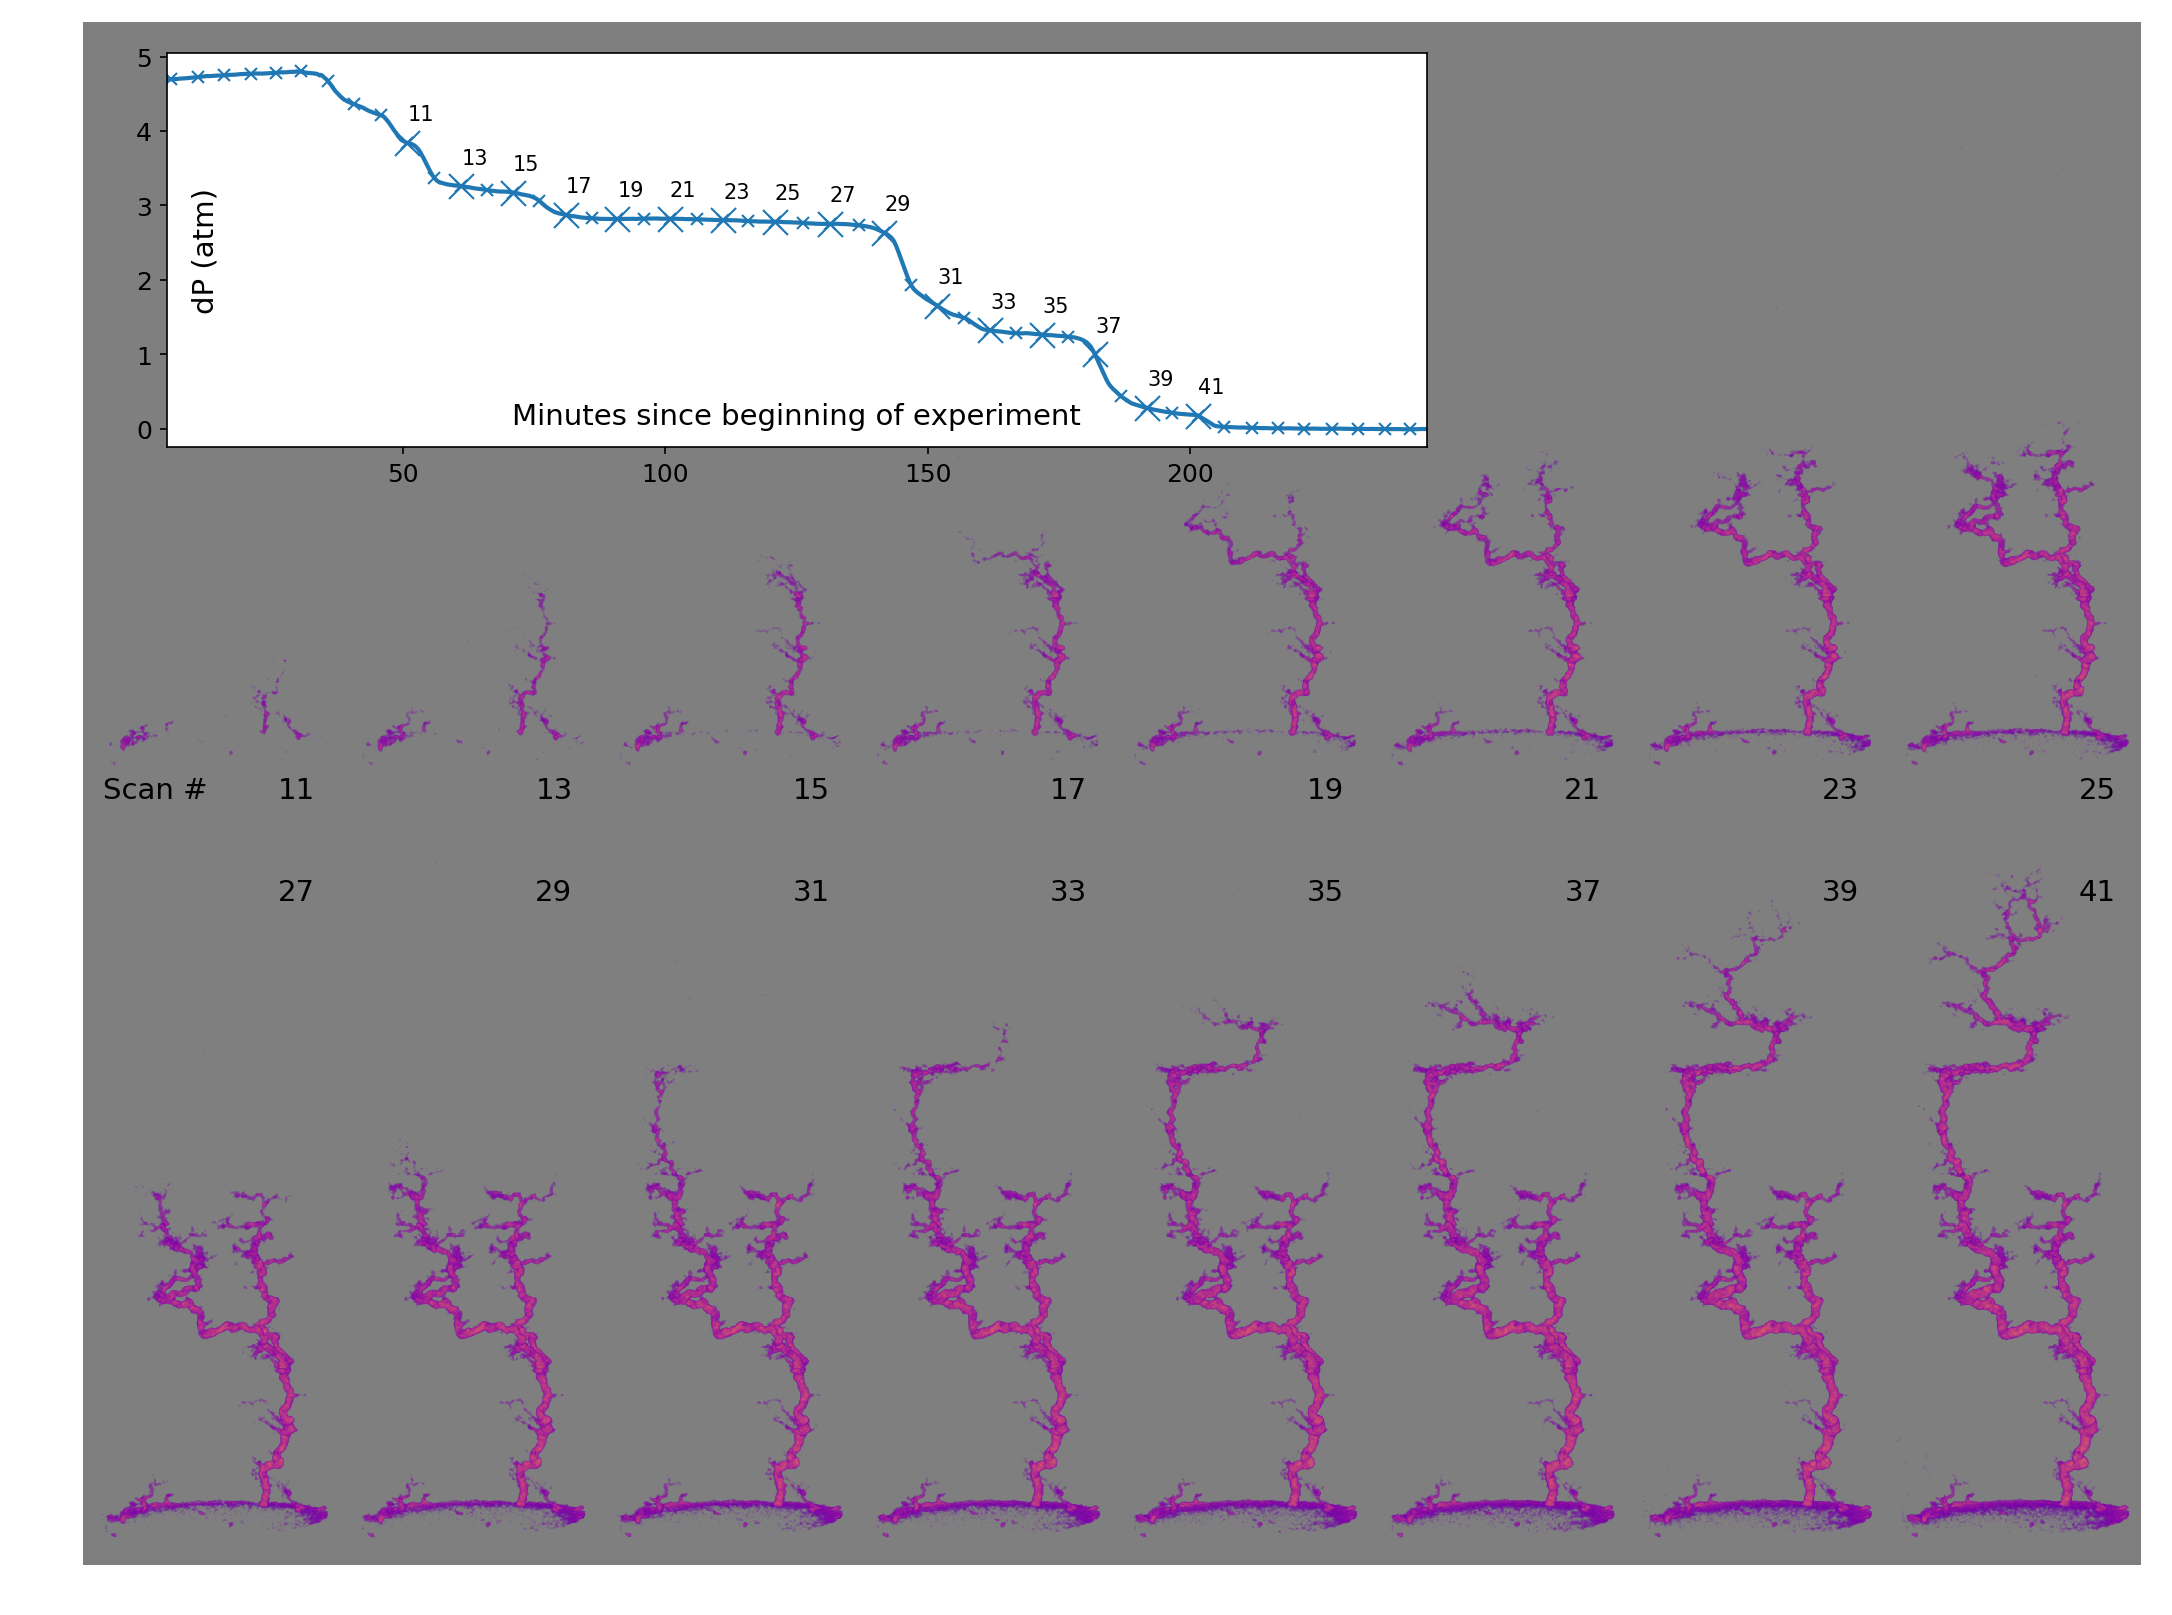

In [1478]:
fbuffer = ones((2100*2,700*8,3), dtype=uint8)*127

f10 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_10r.tif")
f10 = f10[30:-30,1600:2300]
fbuffer[:2100,:700,:] = f10
f12 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_12r.tif")
f12 = f12[30:-30,1600:2300]
fbuffer[:2100,700*1:700*2,:] = f12
f14 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_14r.tif")
f14 = f14[30:-30,1600:2300]
fbuffer[:2100,700*2:700*3,:] = f14
f16 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_16r.tif")
f16 = f16[30:-30,1600:2300]
fbuffer[:2100,700*3:700*4,:] = f16
f18 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_18r.tif")
f18 = f18[30:-30,1600:2300]
fbuffer[:2100,700*4:700*5,:] = f18
f20 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_20r.tif")
f20 = f20[30:-30,1600:2300]
fbuffer[:2100,700*5:700*6,:] = f20
f22 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_22r.tif")
f22 = f22[30:-30,1600:2300]
fbuffer[:2100,700*6:700*7,:] = f22
f24 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_24r.tif")
f24 = f24[30:-30,1600:2300]
fbuffer[:2100,700*7:700*8,:] = f24

f26 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_26r.tif")
f26 = f26[30:-30,1600:2300]
fbuffer[2100:2100*2,:700,:] = f26
f28 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_28r.tif")
f28 = f28[30:-30,1600:2300]
fbuffer[2100:2100*2,700*1:700*2,:] = f28
f30 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_30r.tif")
f30 = f30[30:-30,1600:2300]
fbuffer[2100:2100*2,700*2:700*3,:] = f30
f32 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_32r.tif")
f32 = f32[30:-30,1600:2300]
fbuffer[2100:2100*2,700*3:700*4,:] = f32
f34 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_34r.tif")
f34 = f34[30:-30,1600:2300]
fbuffer[2100:2100*2,700*4:700*5,:] = f34
f36 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_36r.tif")
f36 = f36[30:-30,1600:2300]
fbuffer[2100:2100*2,700*5:700*6,:] = f36
f38 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_38r.tif")
f38 = f38[30:-30,1600:2300]
fbuffer[2100:2100*2,700*6:700*7,:] = f38
f40 = imageio.imread("WormholeGrowth/PZ103_Frames/PZ103_40r.tif")
f40 = f40[30:-30,1600:2300]
fbuffer[2100:2100*2,700*7:700*8,:] = f40

# Prepare pressure data
df = pandas.read_csv("WormholeGrowth//PZ103_PressureLog.csv", sep=";", skiprows=4)
dP = df.iloc[:-1,8:10]
dP['Time SN:702643 (S30X):CH0'] = pandas.to_datetime(dP['Time SN:702643 (S30X):CH0'], format='%m/%d/%Y %I:%M:%S %p.%f')
dP['SN:702643 (S30X):CH0 bar'] = pandas.to_numeric(dP['SN:702643 (S30X):CH0 bar'])
time_delt = dP['Time SN:702643 (S30X):CH0'] - pandas.Timestamp("2020-07-31 08:40:55.073") # Change to change in time
time_delt = time_delt // pandas.Timedelta('1ms')
time_delt = time_delt / 6e4 # Convert to minutes
dP['Time since beginning of experiment (m)'] = time_delt
dP = dP.set_index('Time since beginning of experiment (m)') # Re-index with delta time
pressure = dP['SN:702643 (S30X):CH0 bar'][0.7:247] # Window of core acidization
dPmean = pressure.rolling(20).mean() # Moving average of data to clean fluctuations for plotting
dPmean -= dPmean[220:240].mean() # Subtract value after breakthrough (pressure drops over dispersion disks + lines)

idxs = [fabs(tdf_timedelt[i]-dPmean.index).argmin() for i in arange(49)]

fig = figure(figsize=(14,10.5), dpi=150)
fax = fig.add_axes([0.01, 0.01, 0.98, 0.98])
imshow(fbuffer)
fax = fig.gca()
fax.axis("off")
pax = fig.add_axes([0.05,0.72,0.6,0.25])
dPmean.plot(ax=pax, lw=2)
pax.set_xlabel("Minutes since beginning of experiment", labelpad=-40, fontsize=14)
pax.set_ylabel("dP (atm)", labelpad=-40, fontsize=14)
pax.tick_params(axis='both', labelsize=12)
pax.plot(dPmean.index[idxs], dPmean.values[idxs], "x", color="tab:blue")
pax.plot(dPmean.index[idxs][9:40:2], dPmean.values[idxs][9:40:2], "x", markersize=12, color="tab:blue")
for i in arange(2,49)[9:40:2]:
    pax.text(dPmean.index[idxs[i-2]], dPmean.values[idxs[i-2]]+0.3, str(i))
pax.set_xlim([5, 245])
    
lax = fig.add_axes([0.01,0.4,0.98,0.13])
lax.patch.set_visible(False)
lax.axis("off")
lax.text(0.01,0.75, "Scan #", fontsize=14)
for i in arange(8):
    lax.text((i+1)/8.-0.03, 0.75, str(i*2+11), fontsize=14)
    lax.text((i+1)/8.-0.03, 0.25, str(i*2+27), fontsize=14)
savefig("Fig0.pdf")
show()